# Database exploration

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [68]:
root_path = os.path.dirname(os.getcwd())
root_path

'/Users/marie.dausse/code/mariedos/clairel/ArtRecognition'

source_resize = os.path.join(root_path,'raw_data','train_dir','train_2')
destination_resize = os.path.join(root_path,'raw_data','train_dir','train','train')

directory = os.listdir(source_resize)
for item in directory:
    if os.path.getsize(os.path.join(source_resize,item)) < 30_000_000:
        try:
            img = Image.open(os.path.join(source_resize,item))
            imgResize = img.resize((224, 224), Image.ANTIALIAS)
            imgResize = imgResize.convert('RGB')
            imgResize.save(os.path.join(destination_resize,item), quality = 90)
        except OSError:
            print(f'OSError: {item}')
    else:
        print(item)

import matplotlib.pyplot as plt
import seaborn as sns
files_size = np.array([os.path.getsize(os.path.join(source_resize,item)) for item in directory])
len(files_size[files_size > 10_000_000]),len(files_size)
#sns.boxplot(files_size)
#plt.xlim(right=30_000_000)

print(item)

In [69]:
link = os.path.join(root_path,'raw_data','all_data_info.csv')
link

'/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/raw_data/all_data_info.csv'

In [70]:

db_df = pd.read_csv(link)
print(db_df.shape)
db_df.head()

(103250, 12)


,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


In [71]:
filenames =os.listdir(os.path.join(root_path,'raw_data','train_dir','train','source_images'))

In [72]:
liste_artists = list(db_df['artist'].unique())
artist_file = {}

for artist in liste_artists:
    df_artist =db_df[db_df['artist']==artist]
    artist_file[artist] = list(df_artist['new_filename'])

In [73]:
liste_artists

['Barnett Newman',
 'kiri nichol',
 'Tosa Mitsuoki',
 'Hiroshige',
 'Franz Richard Unterberger',
 'Wolfgang Paalen',
 'Mabuse',
 'Utagawa Kunisada',
 'Ivan Aivazovsky',
 'Paul Serusier',
 'Hieronymus Bosch',
 'Mark Rothko',
 'Jan van Eyck',
 'Julius LeBlanc Stewart',
 'Jan Matejko',
 'Ferdinand Georg Waldmüller',
 'Konstantin Vasilyev',
 'Gustave Dore',
 'Clara Peeters',
 'Diego Velazquez',
 'Matthias Stom',
 'Jean Fouquet',
 'Lyonel Feininger',
 'Titian',
 'Gerrit Dou',
 'Lucas Cranach the Elder',
 'Georges Seurat',
 'Thomas Gainsborough',
 'Michelangelo',
 'Auguste Herbin',
 'Utagawa Kuniyoshi',
 'Odilon Redon',
 'Mario Tozzi',
 'Sandro Botticelli',
 'alex colville',
 'First Station',
 'Fourth Station',
 'Paul Signac',
 'William Turner',
 'Joseph Wright',
 'Claude Lorrain',
 'Johannes Vermeer',
 'Lorenzo Lotto',
 'Henri de Toulouse-Lautrec',
 'Konstantin Somov',
 'Giovanni Bellini',
 'William Hogarth',
 'Thomas Eakins',
 'Paolo Veronese',
 'Pieter Bruegel the Elder',
 'El Greco',
 'C

In [74]:
artist_file

{'Barnett Newman': ['102257.jpg',
  '75232.jpg',
  '62252.jpg',
  '63861.jpg',
  '59145.jpg',
  '73319.jpg',
  '49147.jpg',
  '62037.jpg',
  '100820.jpg',
  '46144.jpg',
  '15019.jpg',
  '52051.jpg',
  '53807.jpg',
  '64686.jpg',
  '77396.jpg',
  '97114.jpg',
  '98213.jpg',
  '62750.jpg',
  '90033.jpg',
  '77137.jpg',
  '3277.jpg',
  '7144.jpg',
  '29234.jpg',
  '2822.jpg',
  '67258.jpg',
  '80710.jpg',
  '73033.jpg',
  '16919.jpg',
  '50321.jpg',
  '275.jpg',
  '61230.jpg',
  '97338.jpg',
  '59205.jpg',
  '896.jpg',
  '884.jpg',
  '1560.jpg',
  '98018.jpg',
  '36566.jpg',
  '63786.jpg',
  '41478.jpg',
  '31795.jpg',
  '88374.jpg',
  '4181.jpg',
  '56533.jpg',
  '49183.jpg',
  '89854.jpg',
  '34286.jpg'],
 'kiri nichol': ['32145.jpg',
  '20304.jpg',
  '836.jpg',
  '52582.jpg',
  '98290.jpg',
  '22455.jpg',
  '91848.jpg',
  '33139.jpg',
  '79598.jpg',
  '94877.jpg',
  '77778.jpg',
  '45899.jpg',
  '3481.jpg',
  '80572.jpg',
  '62652.jpg',
  '57252.jpg',
  '48961.jpg',
  '21651.jpg'],
 '

In [66]:
liste_new_name = []
for index,artist in enumerate(liste_artists,1):
    new_name = f"_{index}"
    liste_new_name.append(new_name)

new_artist_names = dict(zip(liste_new_name,liste_artists))
artists_df =pd.DataFrame.from_dict(new_artist_names,orient='index').reset_index()
artists_df= artists_df.rename(columns=({'index':'artist_number',0:'artist_name'}))
artists_df.to_csv('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/ArtRecognition/data/artists_numbers.csv')

In [75]:
artists_df

,artist_number,artist_name
0,_1,Barnett Newman
1,_2,kiri nichol
2,_3,Tosa Mitsuoki
3,_4,Hiroshige
4,_5,Franz Richard Unterberger
...,...,...
2314,_2315,Le tout en nain
2315,_2316,Tierra
2316,_2317,Aire
2317,_2318,"Ploughed Fields, Maryland"


In [76]:
for index,artist in enumerate(liste_artists,1):
    new_name = f"_{index}"
    artist_dir = os.path.join(root_path,'raw_data','train_dir','train','artistes',new_name)
    if not os.path.exists(artist_dir):
        os.makedirs(artist_dir)

In [77]:
import shutil

for index,artist in enumerate(liste_artists,1):
    new_name = f"_{index}"
    filenames = artist_file[artist]

    for file in filenames:
        source_path = os.path.join(root_path,'raw_data','train_dir','train','source_images',file)
        destination_path = os.path.join(root_path,'raw_data','train_dir','train','artistes',new_name,file)
        
        if os.path.exists(source_path) and not os.path.exists(destination_path):
            shutil.copyfile(source_path, destination_path)

In [11]:
count =db_df[['artist','title']].groupby('artist').count()[['title']]

In [12]:
count =count.sort_values('title',ascending=False).reset_index()

In [13]:
count = count[count['title']>0]

In [78]:
work_count = db_df.groupby(by='artist')[['title']].count().reset_index()
work_count = work_count.rename(columns = {'title':'artwork_count'}).sort_values(by='artwork_count', ascending=False).reset_index(drop=True)
work_count = work_count.loc[work_count['artwork_count']>0]
print(work_count.shape)
work_count.head()

(2312, 2)


,artist,artwork_count
0,Ivan Shishkin,500
1,Pablo Picasso,500
2,Marc Chagall,500
3,Rembrandt,500
4,Ilya Repin,500


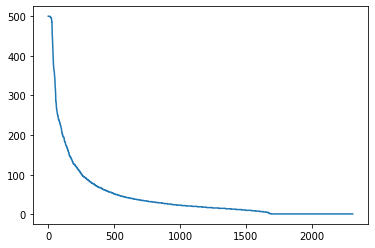

In [15]:
plt.plot(work_count.index, work_count['artwork_count']);

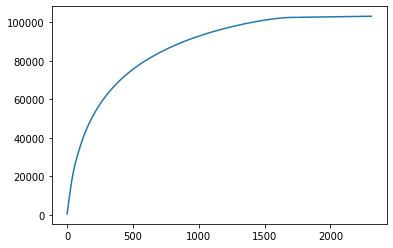

In [16]:
cum_sum = np.cumsum(work_count['artwork_count'])
plt.plot(work_count.index,cum_sum)

In [17]:
cum_sum 

0          500
1         1000
2         1500
3         2000
4         2500
         ...  
2307    103124
2308    103125
2309    103126
2310    103127
2311    103128
Name: artwork_count, Length: 2312, dtype: int64

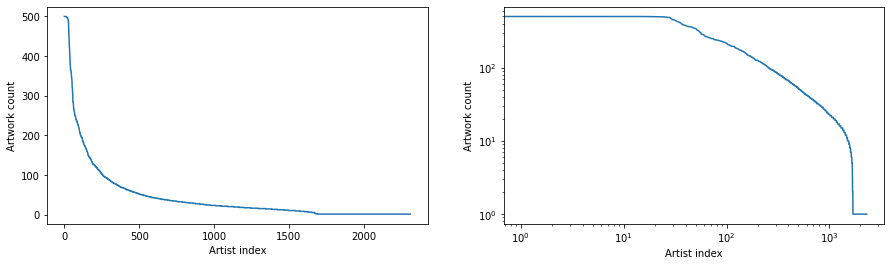

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
for i in range(2):
    ax[i].plot(work_count.index, work_count['artwork_count'])
    if i == 1:
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
    ax[i].set_xlabel('Artist index')
    ax[i].set_ylabel('Artwork count');

In [19]:
for i in range(5):
    print(f"Number of artist between {100*i} and {100*(i+1)-1} artworks: {len(work_count.loc[np.logical_and(work_count['artwork_count']>=100*i, work_count['artwork_count']<=100*(i+1)-1)])}")
print(f"Number of artist with {500} artworks: {len(work_count.loc[work_count['artwork_count']==500])}")

Number of artist between 0 and 99 artworks: 2055
Number of artist between 100 and 199 artworks: 147
Number of artist between 200 and 299 artworks: 53
Number of artist between 300 and 399 artworks: 20
Number of artist between 400 and 499 artworks: 25
Number of artist with 500 artworks: 12


In [79]:
select_artists = work_count[work_count['artwork_count']==500].artist
select_artists

0                  Ivan Shishkin
1                  Pablo Picasso
2                   Marc Chagall
3                      Rembrandt
4                     Ilya Repin
5            John Singer Sargent
6          Pierre-Auguste Renoir
7                 Albrecht Durer
8                Ivan Aivazovsky
9                   Gustave Dore
10    Giovanni Battista Piranesi
11             Zdislav Beksinski
Name: artist, dtype: object

In [96]:
df_new = artists_df[artists_df['artist_name'] == 'Barnett Newman']
list(df_new.loc[:,'artist_number'])[0]


'_1'

In [130]:
select_artists_count = {}

for artist in select_artists:
    df_new = artists_df[artists_df['artist_name'] == artist]
    new_name =list(df_new.loc[:,'artist_number'])[0]
    print(new_name)
    artist_dir = os.path.join(root_path,'raw_data','train_dir','train','artistes',new_name)
    select_artists_count[artist] = [len(os.listdir(artist_dir))]

_161
_483
_588
_61
_419
_239
_99
_104
_9
_18
_169
_316


In [129]:
top_12 = pd.DataFrame.from_dict(select_artists_count,orient='index')
top_12.join(artists_df,how='left')

,0,artist_number,artist_name
Ivan Shishkin,367,NaN,NaN
Pablo Picasso,377,NaN,NaN
Marc Chagall,367,NaN,NaN
Rembrandt,376,NaN,NaN
Ilya Repin,397,NaN,NaN
John Singer Sargent,377,NaN,NaN
Pierre-Auguste Renoir,388,NaN,NaN
Albrecht Durer,383,NaN,NaN
Ivan Aivazovsky,378,NaN,NaN
Gustave Dore,387,NaN,NaN
